In [1]:
from utils_v1 import *


In [2]:
from icecream import ic
import pdb
from sklearn import metrics
import importlib
import utils_v1
import pathlib
import cv2
import sys
import numpy as np
from src import metrics as _metrics
import src.loss as loss
from src.dataset import (
    MultipleDates,
    PA, PADeforestationTime, PADistanceMap, PAMultipleDates,
    MTDeforestationTime,
    MTMultipleDates,
    MAMultipleDates
)

# from src.dataset_legacy import MTDeforestationTime
from src import training_generator as generator
from src.patchesHandler import PatchesHandler, PatchesHandlerMultipleDates
from src.trainer.mcdropout import TrainerMCDropout

In [3]:
from enum import Enum
UncertaintyMethod = Enum('UncertaintyMethod', 'pred_var MI pred_entropy KL pred_entropy_single')
uncertaintyMethod = "pred_entropy"
# uncertaintyMethod = "pred_var"
# uncertaintyMethod = "MI"
# uncertaintyMethod = "KL"

# uncertaintyMethod = "pred_entropy_single"


In [4]:
useLessInferenceRuns = False
reducedInferenceRuns = 30

In [5]:

config = {
	"training": False,
	"save_probabilities": False,
	"loadInference": False,
	"addPastDeforestationInput": True,
	"inference_times": 2,
	"removePolygons": True,
	"uncertainty_method": uncertaintyMethod
}
print(config)

'''
if training == True:
	dates = [2017, 2018]
else:
	dates = [2018, 2019]
if training == True:
	dates = [2018, 2019]
else:
	dates = [2019, 2020]
'''
# dates = [2020, 2021]
# dataset = MAMultipleDates(dates = dates, # dates = [2017, 2018, 2019]. [2018, 2019]. [2015, 2016, 2017, 2018]
# 	addPastDeforestationInput = config['addPastDeforestationInput'],
# 	borderBuffer = 2)	

dates = [2018, 2019]
dataset = PAMultipleDates(dates = dates, # dates = [2017, 2018, 2019]. [2018, 2019]. [2015, 2016, 2017, 2018]
	addPastDeforestationInput = config['addPastDeforestationInput'],
	borderBuffer = 2)	
# dates = [2019, 2020]
# dataset = MTMultipleDates(dates = dates, # dates = [2016,2017,2018,2019]
#  	addPastDeforestationInput = config['addPastDeforestationInput'],
# 	borderBuffer = 2)	

if issubclass(type(dataset), MultipleDates):
	patchesHandler = PatchesHandlerMultipleDates(
		dataset)
else:
	patchesHandler = PatchesHandler()

inference_times = config['inference_times']


if config['training'] == False:
	if type(dataset) == PA:
		exp = 2

	if type(dataset) == PADeforestationTime:
		# exp = 3 # uses past deforestation mask until 2020, which is a mistake. use it until 2018
		exp = 4 # uses past deforestation mask without dates.
		exp = 5 # uses past deforestation mask with dates. 38 epochs.
		exp = 5 # fixes mask.
		exp = 6 # uses past deforestation distance and past deforestation. didnt test it yet        
		exp = 8 # Uses fixed past deforestation distance and past deforestation. 98.9 mAP
		exp = 9 # dummy for coords. high mAP. 99.8.   
		exp = 10 # using fixed fixed past deforestation distance. mAP 90.7   
		exp = 12 # Multiple dates. using fixed fixed past deforestation distance. mAP reduced to 89.6
	if type(dataset) == PADistanceMap:
		exp = 7 # not so good result.
	if type(dataset) == PAMultipleDates:
		exp = 11 # Multiple dates. using fixed fixed past deforestation distance
		exp = 22
		exp = 50
		exp = 52
		# exp = 54
		exp = 56
		exp = 58
		# exp = 63
		# exp = 52
		# exp = 64
		# exp = 66
		exp = 66
		exp = 68
		
		# =============
		# exp = 72 # train 2015-2018
		# exp = 69 # train 2016-2018
		# exp = 70 # train 2017-2018
		
		# train 2018-2019. test 2018-2019
		# exp = 39 # old 
		exp = 76 # 88.4 mAP
		# exp = 71 # 89.5 mAP

		# =============
		
		### exp = 73
		# exp = 71
		# exp = 61

		exp = 77 # good?
		# exp = 78 # good but too short?

		exp = 90 # good result. label ok. f1 84.4 train 2018-2019
		exp = 92 # train 2017-2018
		exp = 93 # train 2016-2018
		exp = 94 # train 2015-2018
		
		exp = 96 # train 2018-2019
		exp = 97 # train 2017-2018
		exp = 98 # train 2016-2018
		exp = 99 # train 2015-2018


		exp = 103


		# train 2017-2018
		# exp = 138
		# exp = 140
		exp = 147
	if type(dataset) == MTDeforestationTime:
		exp = 28
	if type(dataset) == MTMultipleDates:
		exp = 73 # train 2018-2019
		# exp = 74 # train 2016-2019
		# exp = 75 # train 2017-2019
		
		exp = 78 # 2019-2020

		# exp = 88 adds project past deforestation to label
		exp = 89 # ok label. so so result
		
		exp = 91 # ok label. Good result. 81.8 F1. train 2019-2020
		exp = 95 # train 2018-2019
		exp = 100 # train 2017-2019
		exp = 101 # train 2016-2019
		exp = 102 # train 2016-2019
		
		# train 2018-2019
		exp = 137

		exp = 117
		exp = 113
		exp = 110
		exp = 112
		exp = 116

	if type(dataset) == MAMultipleDates:
		exp = 146		
else:
	# exp = 13 # Multiple dates. using fixed fixed past deforestation distance
	exp = 147

trainer = TrainerMCDropout(config, dataset, patchesHandler)

trainer.defineExperiment(exp)


{'training': False, 'save_probabilities': False, 'loadInference': False, 'addPastDeforestationInput': True, 'inference_times': 2, 'removePolygons': True, 'uncertainty_method': 'pred_entropy'}


ic| list(self.date_ids): [0]
ic| self.image_channels: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]
ic| self.input_image_shape: 21
ic| self.dataset.image_channels: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]


In [6]:
exp

147

In [7]:
trainer.createLogFolders()

In [8]:
# ic(type(dataset), exp, dataset.dates)


In [9]:

trainer.loadLabel()

D:/Jorge/datasets/deforestation/Para/deforestation_past_years.tif
Loaded deforestation past years


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


Mask label shape:  
 (17730, 9203, 1) 
 Unique values:  
 [0 1 2]


In [10]:

# Creating tile mask
trainer.createTrainValTestTiles()


Tiles size:  3546 2300
Mask size:  (17730, 9200)


In [11]:

trainer.label_mask.dtype

dtype('uint8')

In [12]:

trainer.getLabelCurrentDeforestation()

In [13]:

trainer.loadInputImage()

ic| image_stack.shape: (17730, 9203, 21)


Image shape:  (17730, 9203, 21)
mask:  (17730, 9200)
image stack:  (17730, 9200, 21)
ref : (17730, 9200, 1)


In [14]:

np.unique(trainer.image_stack[...,0], return_counts=True)

(array([0.        , 0.08333334, 0.16666667, 0.25      , 0.33333334,
        0.4166667 , 0.5       , 0.5833334 , 0.6666667 , 0.75      ,
        0.8333334 , 0.9166667 , 1.        ], dtype=float32),
 array([104050616,   2209014,    644713,    968315,   1458862,   1560879,
          2477424,   1299508,    903419,    864429,   4570932,   3150455,
         38957434], dtype=int64))

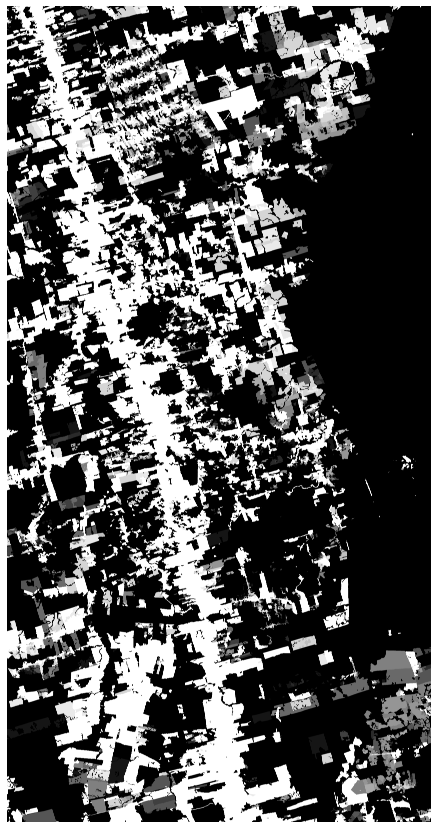

In [15]:

trainer.logger.plotFigure(trainer.image_stack[...,0], 
    name='image_stack_first_channel', cmap=plt.cm.gray, savefig=False)

In [16]:

trainer.getImageChannels()

ic| self.image_stack.shape: (17730, 9200, 21)
ic| self.channels: 21


In [17]:

trainer.getTrainValTestMasks()

Training tiles:  [1, 3, 5, 8, 11, 13, 14, 20]
Validation tiles:  [6, 19]
Test tiles:  [2, 4, 7, 9, 10, 12, 15, 16, 17, 18]


In [ ]:

if config["training"] == True:
    # Extracting patches from the idx matrix
    trainer.createIdxImage()


In [ ]:
if config["training"] == True:
    trainer.extractCoords()

In [ ]:
if config["training"] == True:
    trainer.trainTestSplit()

In [ ]:
if config["training"] == True:
    trainer.label_mask.shape

In [ ]:
if config["training"] == True:
    if type(dataset) != PADeforestationTime and type(dataset) != MTDeforestationTime:
        trainer.logger.plotFigure(trainer.label_mask[...,-1], 
            name='Reference', cmap=plt.cm.gray, savefig=False)

    else:
        trainer.logger.plotFigure(trainer.label_mask[...,-1], 
            name='Reference', cmap=plt.cm.gray, savefig=False)



In [ ]:
if config["training"] == True:
    np.unique(trainer.label_mask)

In [ ]:
if config["training"] == True:
    print(trainer.coords_train)

In [ ]:
if config["training"] == True:
    trainer.retrieveSamplesOfInterest()

In [ ]:
if config["training"] == True:
    inputSnipShow = True

In [ ]:
# count, unique = np.unique(label_mask, return_counts=True)
# print(count, unique)
# print(unique[1]/unique[0])

In [ ]:
'''
count, unique = np.unique(label_mask[mask_amazon_ts == 1], return_counts=True)
print(count, unique)
print(unique[1]/unique[0])
'''

'\ncount, unique = np.unique(label_mask[mask_amazon_ts == 1], return_counts=True)\nprint(count, unique)\nprint(unique[1]/unique[0])\n'

In [ ]:
'''
count, unique = np.unique(label_mask[mask_tr_val == 1], return_counts=True)
print(count, unique)
print(unique[1]/unique[0])
'''

'\ncount, unique = np.unique(label_mask[mask_tr_val == 1], return_counts=True)\nprint(count, unique)\nprint(unique[1]/unique[0])\n'

In [ ]:
if config["training"] == True:
    if inputSnipShow == True:
        trainer.snipDataset(idx = 2800)


In [ ]:
if config["training"] == True:
    if inputSnipShow == True:
        trainer.snipDataset(idx = 97)


In [ ]:
if config["training"] == True:
    if inputSnipShow == True:

        trainer.snipDataset(idx = 1200)

In [ ]:
if config["training"] == True:
    if inputSnipShow == True:

        trainer.snipDataset(idx = 400)

In [ ]:
if config["training"] == True:
    trainer.getGenerators()


In [ ]:
if config["training"] == True:
    trainer.fixChannelNumber()

In [ ]:
if config["training"] == True:
    print(trainer.path_exp)

In [ ]:
if config["training"] == True:
    print(trainer.channels)

In [ ]:
if config["training"] == True:
    print(trainer.image_stack.shape)

In [ ]:
if config["training"] == True:
    trainer.train()

In [ ]:
if config["training"] == True:
    trainer.plotHistory()


In [ ]:
trainer.image_stack.shape

(17730, 9200, 21)

In [ ]:
if type(trainer.dataset) != PADeforestationTime and type(trainer.dataset) != MTDeforestationTime:
    trainer.patchesHandler.dataset.image_channels[-1]

In [ ]:
if issubclass(type(dataset), MultipleDates):
	trainer.channels = trainer.patchesHandler.input_image_shape
	trainer.image_stack = trainer.image_stack[..., trainer.patchesHandler.dataset.image_channels[-1]]
	trainer.label_mask = trainer.label_mask[...,-1]


In [ ]:
trainer.image_stack.shape

(17730, 9200, 21)

In [ ]:
trainer.setPadding()

-30.0 -16.0


In [ ]:
trainer.infer()

ic| self.path_models+ '/' + self.method +'_'+str(0)+'.h5': 'D:/Jorge/datasets/deforestation/experiments/exp147/models/resunet_0.h5'


time:  0
time:  1


In [ ]:
trainer.loadPredictedProbabilities()

In [ ]:
trainer.prob_rec.shape

(17760, 9216, 2)

In [ ]:
'''
if useLessInferenceRuns == True:
    ic(reducedInferenceRuns)

    prob_rec_all = prob_rec.copy()
    prob_rec = prob_rec_all[:reducedInferenceRuns]
    prob_rec = np.transpose(np.squeeze(prob_rec), (1, 2, 0))
'''

'\nif useLessInferenceRuns == True:\n    ic(reducedInferenceRuns)\n\n    prob_rec_all = prob_rec.copy()\n    prob_rec = prob_rec_all[:reducedInferenceRuns]\n    prob_rec = np.transpose(np.squeeze(prob_rec), (1, 2, 0))\n'

In [ ]:
trainer.prob_rec.shape

(17760, 9216, 2)

In [ ]:
trainer.getMeanProb()

In [ ]:
trainer.logger.getStats(trainer.mean_prob)

ic| Error: Failed to access the underlying source code for analysis. Was ic() invoked in a REPL (e.g. from the command line), a frozen application (e.g. packaged with PyInstaller), or did the underlying source code change during execution?


In [ ]:
ic(trainer.mean_prob.shape)

ic| trainer.mean_prob.shape: (17760, 9216)


(17760, 9216)

In [ ]:
trainer.unpadMeanProb()

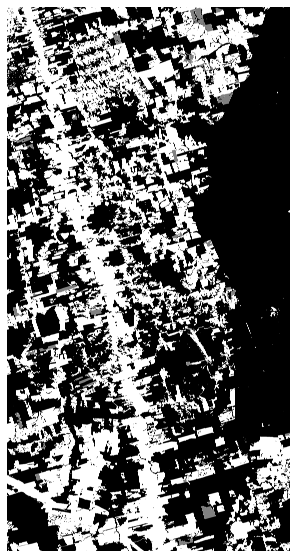

In [ ]:
trainer.logger.plotFigure(trainer.label_mask, 
            name='Reference mask', figsize=(10,10), cmap=plt.cm.gray, savefig=True)

In [ ]:
trainer.squeezeLabel()

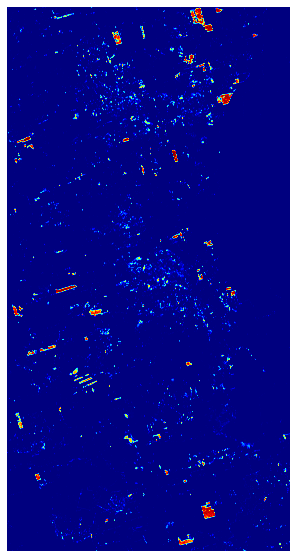

In [ ]:
trainer.setMeanProbNotConsideredAreas()
trainer.logger.plotFigure(trainer.mean_prob, 
            name='Mean predicted probability', figsize=(10,10), cmap='jet', savefig=False)

In [ ]:
print(trainer.label_mask.shape)

(17730, 9200)


In [ ]:
trainer.getLabelTest()

(54236371,)
(array([0, 1], dtype=uint8), array([53470765,   765606], dtype=int64))


In [ ]:
trainer.getMAP()

88.17


In [ ]:
trainer.prob_rec.shape

(17760, 9216, 2)

In [ ]:
trainer.preprocessProbRec()
print(trainer.prob_rec.shape)

(2, 17760, 9216, 1)


In [ ]:
trainer.prob_rec.shape

(2, 17760, 9216, 1)

In [ ]:
trainer.logger.getStats(trainer.prob_rec)

ic| Error: Failed to access the underlying source code for analysis. Was ic() invoked in a REPL (e.g. from the command line), a frozen application (e.g. packaged with PyInstaller), or did the underlying source code change during execution?


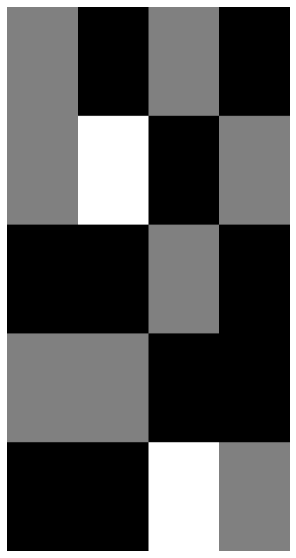

In [ ]:
trainer.logger.plotFigure(trainer.mask_tr_val, 
            name=trainer.dataset.site + trainer.title_name + ' Train val mask.png', figsize=(10,10), savefig=False)

In [ ]:
trainer.getLabelCurrentDeforestation()

In [ ]:
trainer.applyProbabilityThreshold()

(17730, 9200)
(array([0., 1.], dtype=float32), array([161011097,   2104903], dtype=int64))


ic| self.predicted_unpad.shape: (17730, 9200)
    self.predicted.shape: (17730, 9200)


In [ ]:
trainer.getTestValues()

ic| predicted_test.shape: (81558000,)
ic| predicted_test.shape: (54236371,)


In [ ]:
trainer.removeSmallPolygons()

ic| np.unique(predicted, return_counts=True): (array([0., 1.], dtype=float32), array([161011097,   2104903], dtype=int64))
    np.unique(predicted_larger_than_min_area, return_counts=True): (array([0., 1.], dtype=float32), array([161299676,   1816324], dtype=int64))
ic| np.unique(ignored_polygons, return_counts=True): (array([0., 1.], dtype=float32), array([162827421,    288579], dtype=int64))
ic| predicted.shape: (17730, 9200), label_mask.shape: (17730, 9200)
ic| predicted_masked.shape: (81558000,)
    label_masked.shape: (81558000,)
ic| np.unique(label_masked, return_counts=True): (array([0, 1, 2], dtype=uint8),
                                                  array([53367771,   730207, 27460022], dtype=int64))
ic| predicted_masked.shape: (54097978,)
    label_masked.shape: (54097978,)


In [ ]:
trainer.calculateMetrics()

ic| self.f1: 83.58, self.precision: 84.26, self.recall: 82.9


In [ ]:
trainer.getValidationValuesForMetrics()
trainer.calculateMetricsValidation()

ic| self.label_mask_val.shape: (16311600,)
ic| self.label_mask_val_valid.shape: (9416956,)
ic| f1_val: 85.94
    precision_val: 81.44
    recall_val: 90.96
    mAP_val: 91.52


In [ ]:
calculateMAPWithoutSmallPolygons = False
if calculateMAPWithoutSmallPolygons == True:
    trainer.calculateMAPWithoutSmallPolygons()

In [ ]:
trainer.getErrorMask()

(array([0., 1.], dtype=float32), array([162446210,    669790], dtype=int64))


In [ ]:
trainer.getErrorMaskToShowRGB()

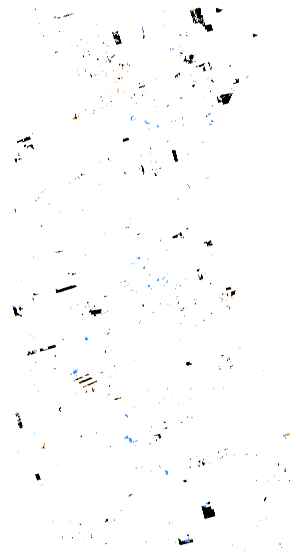

In [ ]:
trainer.logger.plotFigure(trainer.error_mask_to_show_rgb[...,::-1], 
            name=trainer.dataset.site + trainer.title_name + ' error mask color.png', 
            figsize=(10,10), savefig=True, dpi=300)

In [ ]:
'''
import types

trainer.setUncertainty = types.MethodType(setUncertainty, trainer)
'''


In [ ]:
trainer.setUncertainty()

In [ ]:
trainer.getUncertaintyToShow()
trainer.logger.getStats(trainer.uncertainty_to_show)


ic| Error: Failed to access the underlying source code for analysis. Was ic() invoked in a REPL (e.g. from the command line), a frozen application (e.g. packaged with PyInstaller), or did the underlying source code change during execution?


ic| trainer.uncertainty_to_show.shape: (17730, 9200)


(17730, 9200)

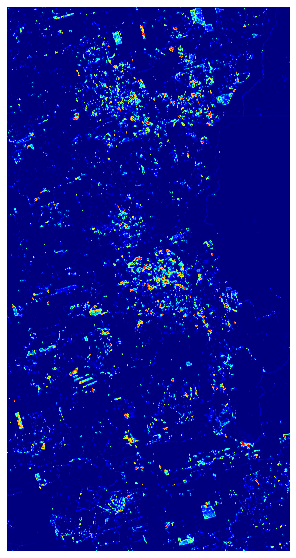

In [ ]:

trainer.logger.plotFigure(trainer.uncertainty_to_show, 
            name=trainer.dataset.site + trainer.title_name + ' uncertainty '+trainer.config['uncertainty_method']+'.png', figsize=(10,10), cmap='jet', savefig=True)

ic(trainer.uncertainty_to_show.shape)



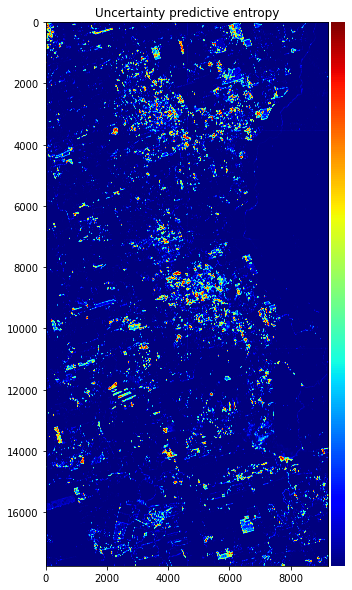

In [ ]:

import src.uncertainty
fig, ax = plt.subplots(1,1,figsize=(10,10))
src.uncertainty.show_im(trainer.uncertainty_map, ax, title = 'Uncertainty predictive entropy')
plt.axis('off')
plt.savefig('output/figures/Para' + trainer.title_name + ' uncertainty '+trainer.config['uncertainty_method']+'.png', 
    dpi=150, bbox_inches='tight')

In [ ]:
trainer.getValidationValues2()
trainer.getTestValues2()

ic| self.label_mask.shape: (17730, 9200)
ic| self.mask_amazon_ts.shape: (17730, 9200)
ic| self.label_mask_test.shape: (81558000,)
ic| self.error_mask_test.shape: (54097978,)


ic| trainer.dataset.previewLims1: array([2200, 3200, 6900, 7900])
    trainer.dataset.previewLims2: array([ 500, 1500, 3500, 4500])
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]): array([1], dtype=uint8)
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True): (array([1], dtype=uint8), array([1000000], dtype=int64))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


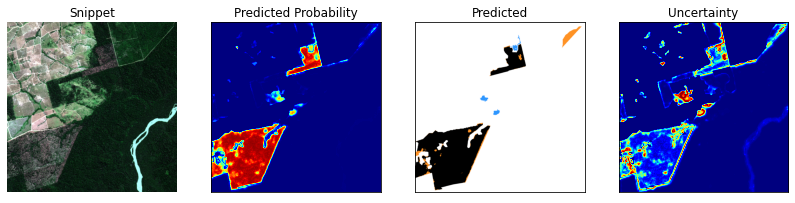

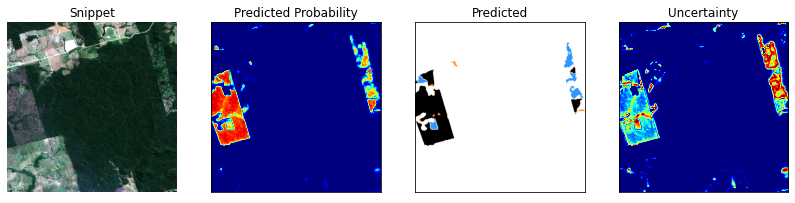

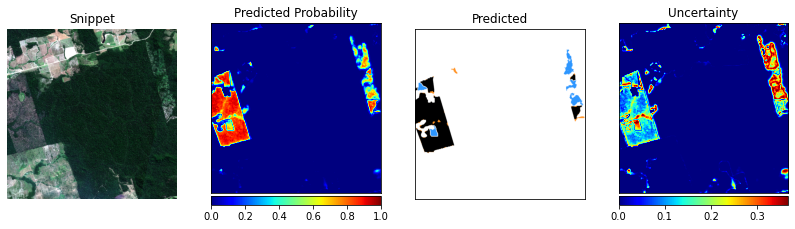

In [ ]:
trainer.logger.plotCropSample(trainer)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


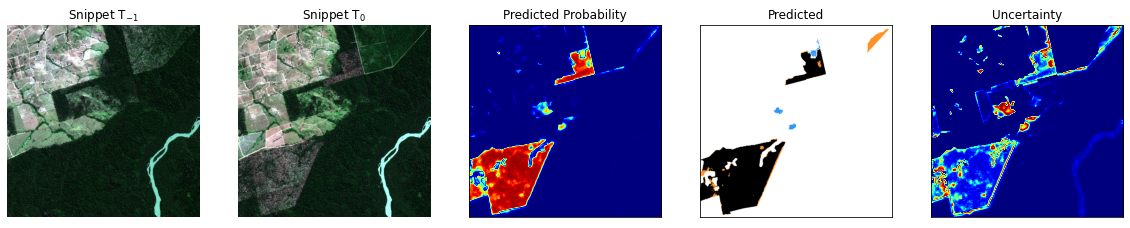

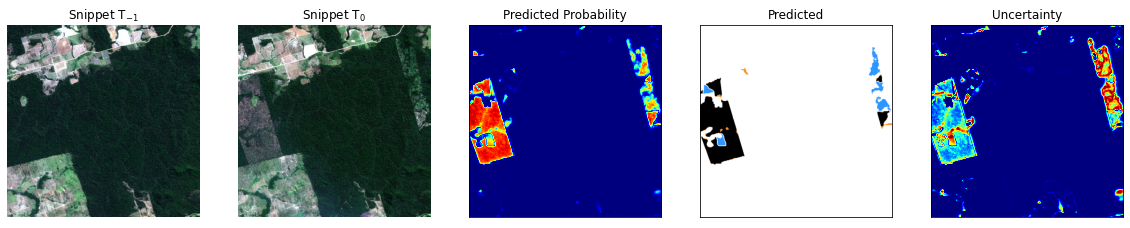

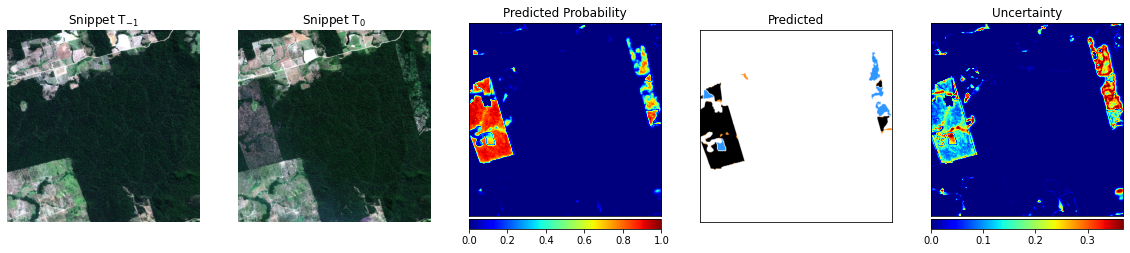

In [ ]:
trainer.logger.plotCropSampleT0T1(trainer)

In [ ]:
'''
dataset.previewLims1 = np.array([200, 700, 10200, 11200])
dataset.previewLims2 = np.array([2500, 3500, 6000, 7000])
'''

ic| dataset.previewLims1: array([  200,   700, 10200, 11200])
    dataset.previewLims2: array([2500, 3500, 6000, 7000])
ic| np.unique(mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]): array([1], dtype=uint8)
ic| np.unique(mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True): (array([1], dtype=uint8), array([1000000], dtype=int64))


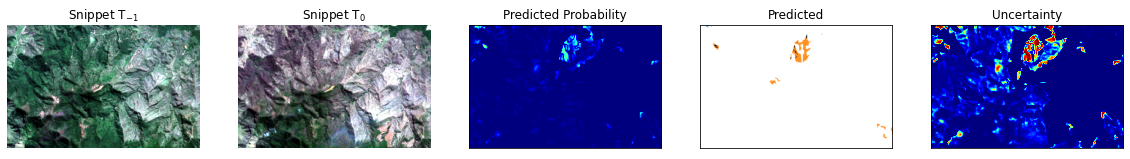

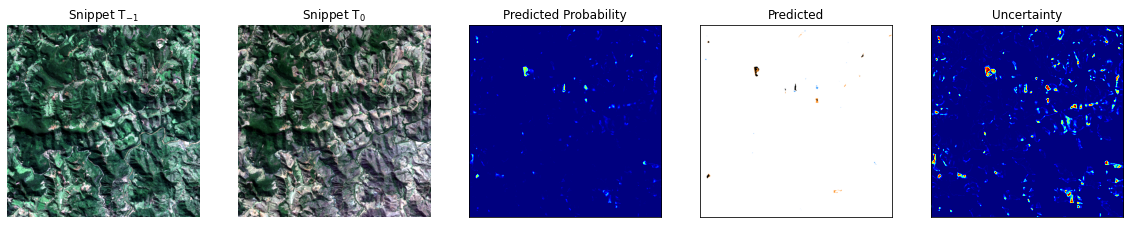

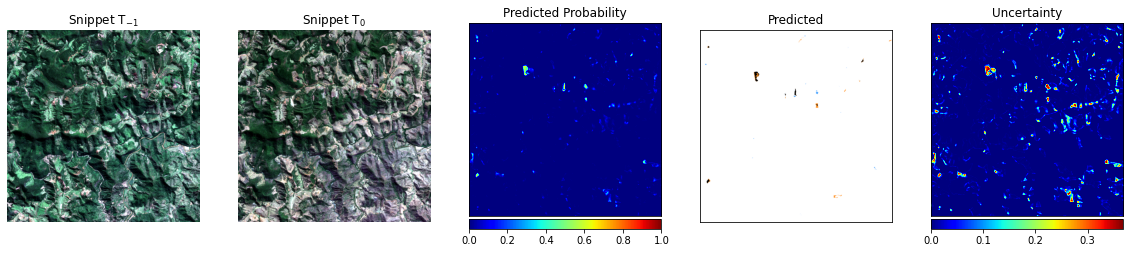

In [ ]:
'''
import importlib
importlib.reload(_plt)
plotCropSampleFlag = True
if plotCropSampleFlag == True:
        importlib.reload(_metrics)
        importlib.reload(_plt)
        # import matplotlib
        # customCmap = matplotlib.colors.ListedColormap(['black', 'red'])
        ic(dataset.previewLims1, dataset.previewLims2)
        lims = dataset.previewLims1
        ic(np.unique(mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]))
        lims = dataset.previewLims2
        ic(np.unique(mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True))

        _plt.plotCropSample5(image_stack[...,previewBandsT0], image_stack[...,previewBandsT1], mean_prob, 
                error_mask_to_show_rgb[...,::-1], pred_entropy_to_show, 
                lims = dataset.previewLims1, 
                titles = ['Snippet $\mathregular{T_{-1}}$', 'Snippet $\mathregular{T_0}$', 'Predicted Probability', 'Predicted', 'Uncertainty'],
                cmaps = [plt.cm.gray, plt.cm.gray, 'jet', plt.cm.gray, 'jet'],
                maskBackground = [False, False, True, False, True],
                invertMask = [False, False, False, False, False], uncertainty_vlims = uncertainty_vlims)
        plt.savefig('output/figures/' + dataset.__class__.__name__ + 'PredictSampleUncertainty1_.png', dpi=150, bbox_inches='tight')

        _plt.plotCropSample5(image_stack[...,previewBandsT0], image_stack[...,previewBandsT1], mean_prob, 
                error_mask_to_show_rgb[...,::-1], pred_entropy_to_show, 
                lims = dataset.previewLims2, 
                titles = ['Snippet $\mathregular{T_{-1}}$', 'Snippet $\mathregular{T_0}$', 'Predicted Probability', 'Predicted', 'Uncertainty'],
                cmaps = [plt.cm.gray, plt.cm.gray, 'jet', plt.cm.gray, 'jet'],
                maskBackground = [False, False, True, False, True],
                invertMask = [False, False, False, False, False], uncertainty_vlims = uncertainty_vlims)
        plt.savefig('output/figures/' + dataset.__class__.__name__ + 'PredictSampleUncertainty2_.png', dpi=150, bbox_inches='tight')

        _plt.plotCropSample5(image_stack[...,previewBandsT0], image_stack[...,previewBandsT1], mean_prob, 
                error_mask_to_show_rgb[...,::-1], pred_entropy_to_show, 
                lims = dataset.previewLims2, 
                titles = ['Snippet $\mathregular{T_{-1}}$', 'Snippet $\mathregular{T_0}$', 'Predicted Probability', 'Predicted', 'Uncertainty'],
                cmaps = [plt.cm.gray, plt.cm.gray, 'jet', plt.cm.gray, 'jet'],
                maskBackground = [False, False, True, False, True],
                invertMask = [False, False, False, False, False], uncertainty_vlims = uncertainty_vlims,
                colorbar = True)
        plt.savefig('output/figures/' + dataset.__class__.__name__ + 'PredictSampleUncertaintyColorbar_.png', dpi=150, bbox_inches='tight')
'''

In [ ]:
trainer.logger.getStats(trainer.uncertainty)


ic| Error: Failed to access the underlying source code for analysis. Was ic() invoked in a REPL (e.g. from the command line), a frozen application (e.g. packaged with PyInstaller), or did the underlying source code change during execution?


Get precision-recall threshold

In [ ]:

trainer.getUncertaintyAAValues()

ic| uncertainty.shape: (22176805,)
    label_mask_current_deforestation_test.shape: (22176805,)


[0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 0.25, 0.27, 0.3, 0.34, 0.36, 0.3648794801235199, 0.3663794801235199]
threshold 0.0025
(12410434,) (12410434,)


ic| label_current_deforestation_test_classified_incorrect.shape: (9766371,)
    predicted_test_classified_incorrect.shape: (9766371,)


cm_correct [[12410416        0]
 [      18        0]]


d:\Jorge\deforestation_uncertainty\src\metrics.py:296: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_L = TP_L / (TP_L + FP_L)
ic| TP_H + FN_H + FP_H + TN_H: 9766371
    len(label_mask_current_deforestation_test): 22176805
ic| TP_H + FN_H + FP_H + TN_H: 9766371
    len(label_mask_current_deforestation_test): 22176805


cm_incorrect [[9690761   24500]
 [  38523   12587]]
[       nan 0.         0.         0.44038675 0.33939116 0.24627275]
threshold 0.005
(14487578,) (14487578,)


ic| label_current_deforestation_test_classified_incorrect.shape: (7689227,)
    predicted_test_classified_incorrect.shape: (7689227,)


cm_correct [[14487530        0]
 [      48        0]]


d:\Jorge\deforestation_uncertainty\src\metrics.py:296: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_L = TP_L / (TP_L + FP_L)
ic| TP_H + FN_H + FP_H + TN_H: 7689227
    len(label_mask_current_deforestation_test): 22176805
ic| TP_H + FN_H + FP_H + TN_H: 7689227
    len(label_mask_current_deforestation_test): 22176805


cm_incorrect [[7613647   24500]
 [  38493   12587]]
[       nan 0.         0.         0.34672384 0.33939116 0.24641738]
threshold 0.0075
(15651338,) (15651338,)


ic| label_current_deforestation_test_classified_incorrect.shape: (6525467,)
    predicted_test_classified_incorrect.shape: (6525467,)


cm_correct [[15651264        0]
 [      74        0]]


d:\Jorge\deforestation_uncertainty\src\metrics.py:296: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_L = TP_L / (TP_L + FP_L)
ic| TP_H + FN_H + FP_H + TN_H: 6525467
    len(label_mask_current_deforestation_test): 22176805
ic| TP_H + FN_H + FP_H + TN_H: 6525467
    len(label_mask_current_deforestation_test): 22176805


cm_incorrect [[6449913   24500]
 [  38467   12587]]
[       nan 0.         0.         0.29424739 0.33939116 0.24654288]
threshold 0.01
(16429975,) (16429975,)


ic| label_current_deforestation_test_classified_incorrect.shape: (5746830,)
    predicted_test_classified_incorrect.shape: (5746830,)


cm_correct [[16429878        0]
 [      97        0]]


d:\Jorge\deforestation_uncertainty\src\metrics.py:296: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_L = TP_L / (TP_L + FP_L)
ic| TP_H + FN_H + FP_H + TN_H: 5746830
    len(label_mask_current_deforestation_test): 22176805
ic| TP_H + FN_H + FP_H + TN_H: 5746830
    len(label_mask_current_deforestation_test): 22176805


cm_incorrect [[5671299   24500]
 [  38444   12587]]
[       nan 0.         0.         0.25913697 0.33939116 0.24665399]
threshold 0.015
(17433240,) (17433240,)


ic| label_current_deforestation_test_classified_incorrect.shape: (4743565,)
    predicted_test_classified_incorrect.shape: (4743565,)


cm_correct [[17433084        0]
 [     156        0]]


d:\Jorge\deforestation_uncertainty\src\metrics.py:296: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_L = TP_L / (TP_L + FP_L)
ic| TP_H + FN_H + FP_H + TN_H: 4743565
    len(label_mask_current_deforestation_test): 22176805
ic| TP_H + FN_H + FP_H + TN_H: 4743565
    len(label_mask_current_deforestation_test): 22176805


cm_incorrect [[4668093   24500]
 [  38385   12587]]
[       nan 0.         0.         0.21389758 0.33939116 0.2469395 ]
threshold 0.025
(18518877,) (18518877,)


ic| label_current_deforestation_test_classified_incorrect.shape: (3657928,)
    predicted_test_classified_incorrect.shape: (3657928,)


cm_correct [[18518562        0]
 [     315        0]]


d:\Jorge\deforestation_uncertainty\src\metrics.py:296: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_L = TP_L / (TP_L + FP_L)
ic| TP_H + FN_H + FP_H + TN_H: 3657928
    len(label_mask_current_deforestation_test): 22176805
ic| TP_H + FN_H + FP_H + TN_H: 3657928
    len(label_mask_current_deforestation_test): 22176805


cm_incorrect [[3582615   24500]
 [  38226   12587]]
[       nan 0.         0.         0.16494387 0.33939116 0.2477122 ]
threshold 0.05
(19715322,) (19715322,)


ic| label_current_deforestation_test_classified_incorrect.shape: (2461483,)
    predicted_test_classified_incorrect.shape: (2461483,)


cm_correct [[19714535        0]
 [     787        0]]


d:\Jorge\deforestation_uncertainty\src\metrics.py:296: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_L = TP_L / (TP_L + FP_L)
ic| TP_H + FN_H + FP_H + TN_H: 2461483
    len(label_mask_current_deforestation_test): 22176805
ic| TP_H + FN_H + FP_H + TN_H: 2461483
    len(label_mask_current_deforestation_test): 22176805


cm_incorrect [[2386642   24500]
 [  37754   12587]]
[       nan 0.         0.         0.11099358 0.33939116 0.25003476]
threshold 0.08
(20370901,) (20370901,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1805904,)
    predicted_test_classified_incorrect.shape: (1805904,)


cm_correct [[20369342        0]
 [    1559        0]]


d:\Jorge\deforestation_uncertainty\src\metrics.py:296: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_L = TP_L / (TP_L + FP_L)
ic| TP_H + FN_H + FP_H + TN_H: 1805904
    len(label_mask_current_deforestation_test): 22176805
ic| TP_H + FN_H + FP_H + TN_H: 1805904
    len(label_mask_current_deforestation_test): 22176805


cm_incorrect [[1731835   24500]
 [  36982   12587]]
[       nan 0.         0.         0.08143211 0.33939116 0.25392887]
threshold 0.1
(20646314,) (20646314,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1530491,)
    predicted_test_classified_incorrect.shape: (1530491,)


cm_correct [[20644211        0]
 [    2103        0]]
cm_incorrect [[1456966   24500]
 [  36438   12587]]


d:\Jorge\deforestation_uncertainty\src\metrics.py:296: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_L = TP_L / (TP_L + FP_L)
ic| TP_H + FN_H + FP_H + TN_H: 1530491
    len(label_mask_current_deforestation_test): 22176805
ic| TP_H + FN_H + FP_H + TN_H: 1530491
    len(label_mask_current_deforestation_test): 22176805


[       nan 0.         0.         0.06901314 0.33939116 0.25674656]
threshold 0.15
(21102369,) (21102369,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1074436,)
    predicted_test_classified_incorrect.shape: (1074436,)
ic| TP_H + FN_H + FP_H + TN_H: 1074436
    len(label_mask_current_deforestation_test): 22176805
ic| TP_H + FN_H + FP_H + TN_H: 1074436
    len(label_mask_current_deforestation_test): 22176805


cm_correct [[21098621        8]
 [    3740        0]]
cm_incorrect [[1002556   24492]
 [  34801   12587]]
[0.         0.         0.         0.04844864 0.33946439 0.26561577]
threshold 0.2
(21402505,) (21402505,)


ic| label_current_deforestation_test_classified_incorrect.shape: (774300,)
    predicted_test_classified_incorrect.shape: (774300,)
ic| TP_H + FN_H + FP_H + TN_H: 774300
    len(label_mask_current_deforestation_test): 22176805
ic| TP_H + FN_H + FP_H + TN_H: 774300
    len(label_mask_current_deforestation_test): 22176805


cm_correct [[21395054      982]
 [    6356      113]]
cm_incorrect [[706123  23518]
 [ 32185  12474]]
[0.10319635 0.01746792 0.00221014 0.03491486 0.34657702 0.2793166 ]
threshold 0.225
(21522219,) (21522219,)


ic| label_current_deforestation_test_classified_incorrect.shape: (654586,)
    predicted_test_classified_incorrect.shape: (654586,)
ic| TP_H + FN_H + FP_H + TN_H: 654586
    len(label_mask_current_deforestation_test): 22176805
ic| TP_H + FN_H + FP_H + TN_H: 654586
    len(label_mask_current_deforestation_test): 22176805


cm_correct [[21511525     2406]
 [    7886      402]]
cm_incorrect [[589652  22094]
 [ 30655  12185]]
[0.14316239 0.04850386 0.00786262 0.0295167  0.35546545 0.28443044]
threshold 0.25
(21628085,) (21628085,)


ic| label_current_deforestation_test_classified_incorrect.shape: (548720,)
    predicted_test_classified_incorrect.shape: (548720,)
ic| TP_H + FN_H + FP_H + TN_H: 548720
    len(label_mask_current_deforestation_test): 22176805
ic| TP_H + FN_H + FP_H + TN_H: 548720
    len(label_mask_current_deforestation_test): 22176805


cm_correct [[21613763     3493]
 [    9649     1180]]
cm_incorrect [[487414  21007]
 [ 28892  11407]]
[0.25251444 0.10896666 0.02307933 0.02474297 0.35191584 0.28305913]
threshold 0.27
(21705427,) (21705427,)


ic| label_current_deforestation_test_classified_incorrect.shape: (471378,)
    predicted_test_classified_incorrect.shape: (471378,)
ic| TP_H + FN_H + FP_H + TN_H: 471378
    len(label_mask_current_deforestation_test): 22176805
ic| TP_H + FN_H + FP_H + TN_H: 471378
    len(label_mask_current_deforestation_test): 22176805


cm_correct [[21687283     4728]
 [   11290     2126]]
cm_incorrect [[413894  19772]
 [ 27251  10461]]
[0.31018383 0.1584675  0.04158191 0.02125545 0.34601264 0.27739181]
threshold 0.3
(21815257,) (21815257,)


ic| label_current_deforestation_test_classified_incorrect.shape: (361548,)
    predicted_test_classified_incorrect.shape: (361548,)
ic| TP_H + FN_H + FP_H + TN_H: 361548
    len(label_mask_current_deforestation_test): 22176805
ic| TP_H + FN_H + FP_H + TN_H: 361548
    len(label_mask_current_deforestation_test): 22176805


cm_correct [[21788422     7919]
 [   14215     4701]]
cm_incorrect [[312755  16581]
 [ 24326   7886]]
[0.37250396 0.24851977 0.0919457  0.01630298 0.32231169 0.2448156 ]
threshold 0.34
(21966207,) (21966207,)


ic| label_current_deforestation_test_classified_incorrect.shape: (210598,)
    predicted_test_classified_incorrect.shape: (210598,)
ic| TP_H + FN_H + FP_H + TN_H: 210598
    len(label_mask_current_deforestation_test): 22176805
ic| TP_H + FN_H + FP_H + TN_H: 210598
    len(label_mask_current_deforestation_test): 22176805


cm_correct [[21916007    19956]
 [   19262    10982]]
cm_incorrect [[185170   4544]
 [ 19279   1605]]
[0.354968   0.36311334 0.21479424 0.00949632 0.26101805 0.07685309]
threshold 0.36
(22068780,) (22068780,)


ic| label_current_deforestation_test_classified_incorrect.shape: (108025,)
    predicted_test_classified_incorrect.shape: (108025,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:299: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 108025
    len(label_mask_current_deforestation_test): 22176805
ic| TP_H + FN_H + FP_H + TN_H: 108025
    len(label_mask_current_deforestation_test): 22176805


cm_correct [[22003952    24500]
 [   27741    12587]]
cm_incorrect [[97225     0]
 [10800     0]]
[0.33939116 0.31211565 0.24618604 0.00487108        nan 0.        ]
threshold 0.3648794801235199
(22110725,) (22110725,)


ic| label_current_deforestation_test_classified_incorrect.shape: (66080,)
    predicted_test_classified_incorrect.shape: (66080,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:299: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 66080
    len(label_mask_current_deforestation_test): 22176805
ic| TP_H + FN_H + FP_H + TN_H: 66080
    len(label_mask_current_deforestation_test): 22176805


cm_correct [[22041756    24500]
 [   31882    12587]]
cm_incorrect [[59421     0]
 [ 6659     0]]
[0.33939116 0.28305111 0.24618604 0.00297969        nan 0.        ]
threshold 0.3663794801235199
(22129915,) (22129915,)


ic| label_current_deforestation_test_classified_incorrect.shape: (46890,)
    predicted_test_classified_incorrect.shape: (46890,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:299: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 46890
    len(label_mask_current_deforestation_test): 22176805
ic| TP_H + FN_H + FP_H + TN_H: 46890
    len(label_mask_current_deforestation_test): 22176805


cm_correct [[22059014    24500]
 [   33814    12587]]
cm_incorrect [[42163     0]
 [ 4727     0]]
[0.33939116 0.27126571 0.24618604 0.00211437        nan 0.        ]


In [ ]:
trainer.getUncertaintyAAAuditedValues()

ic| uncertainty.shape: (22176805,)
    label_mask_current_deforestation_test.shape: (22176805,)


threshold 0.0025
(22176805,) (22176805,)
cm_audited [[22125677        0]
 [      18    51110]]
[1.         0.99964794]
threshold 0.005
(22176805,) (22176805,)
cm_audited [[22125677        0]
 [      48    51080]]
[1.         0.99906118]
threshold 0.0075
(22176805,) (22176805,)
cm_audited [[22125677        0]
 [      74    51054]]
[1.         0.99855265]
threshold 0.01
(22176805,) (22176805,)
cm_audited [[22125677        0]
 [      97    51031]]
[1.        0.9981028]
threshold 0.015
(22176805,) (22176805,)
cm_audited [[22125677        0]
 [     156    50972]]
[1.         0.99694883]
threshold 0.025
(22176805,) (22176805,)
cm_audited [[22125677        0]
 [     315    50813]]
[1.         0.99383899]
threshold 0.05
(22176805,) (22176805,)
cm_audited [[22125677        0]
 [     787    50341]]
[1.         0.98460726]
threshold 0.08
(22176805,) (22176805,)
cm_audited [[22125677        0]
 [    1559    49569]]
[1.        0.9695079]
threshold 0.1
(22176805,) (22176805,)
cm_audited [[22125677  

ic| metric_values_audited: array([[1.        , 0.99964794],
                                  [1.        , 0.99906118],
                                  [1.        , 0.99855265],
                                  [1.        , 0.9981028 ],
                                  [1.        , 0.99694883],
                                  [1.        , 0.99383899],
                                  [1.        , 0.98460726],
                                  [1.        , 0.9695079 ],
                                  [1.        , 0.95886794],
                                  [0.99983121, 0.92685026],
                                  [0.9785374 , 0.87568456],
                                  [0.94729232, 0.84575966],
                                  [0.92232945, 0.81127758],
                                  [0.89391016, 0.77918166],
                                  [0.82336278, 0.7219723 ],
                                  [0.61491259, 0.62325927],
                                  [0.488

cm_audited [[22101177    24500]
 [   33814    17314]]
[0.41407184 0.33864028]


In [ ]:
trainer.setPlotLimsForUncertaintyAA()

In [ ]:
'''
xlim = [-0.3, 12.7]
xlim = [-0.1, 10.4]

ylim = [0, 105]
'''
trainer.plotUncertaintyAA()

In [ ]:
trainer.getOptimalUncertaintyThreshold()

In [ ]:
trainer.getUncertaintyMetricsFromOptimalThreshold()